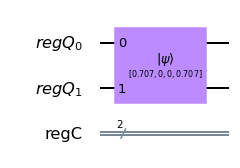

In [1]:
from qiskit import *
import numpy as np

# initialize a circuit with an arbitrary pure state

QR = QuantumRegister(2,'regQ')
CR = ClassicalRegister(2,'regC')
circuit = QuantumCircuit(QR, CR)

#myList = [1,1,1,1]
#myInt = 4
#myList[:] = [x / myInt for x in myList]
#otherQC.initialize(myList, [myQR[0], myQR[1]])

circuit.initialize([1, 0, 0, 1] / np.sqrt(2), [QR[0], QR[1]])
#otherQC.initialize(np.array([1, 1, 1, 1]) / 2.0, [myQR[0], myQR[1]])

circuit.draw(output='mpl')

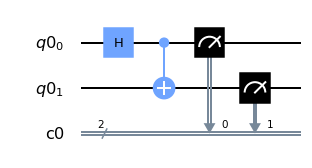

In [2]:
# Composition

# measure method has two arguments: the qubit being measured, and the bit where the result is written.
# measureQC.measure(myQR[1],myCR[1])

myQR = QuantumRegister(2)
myCR = ClassicalRegister(2)

InitQC = QuantumCircuit (myQR,myCR) 
InitQC.h(myQR[0])

CNegateQC = QuantumCircuit (myQR, myCR)
CNegateQC.cx(myQR[0],myQR[1])

MeasureQC = QuantumCircuit (myQR, myCR)
MeasureQC.measure (myQR, myCR)

myAlgorithm = InitQC + CNegateQC + MeasureQC

myAlgorithm.draw()


# CUSTOM GATES   #############################################################


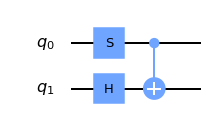

In [3]:
print ("# CUSTOM GATES   #############################################################")

sub_circuit = QuantumCircuit(2, name='myGate')
sub_circuit.s(0)
sub_circuit.h(1)
sub_circuit.cx(0,1)
sub_circuit.draw(output='mpl')

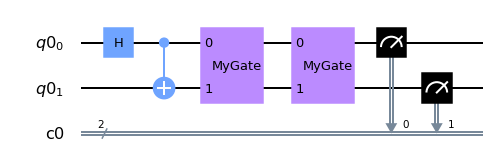

In [4]:
myGate = sub_circuit.to_instruction()

myNewAlgorithm = InitQC + CNegateQC
myNewAlgorithm.append(myGate, [myQR[0],myQR[1]])
myNewAlgorithm.append(myGate, [myQR[0],myQR[1]])
myNewAlgorithm = myNewAlgorithm + MeasureQC
myNewAlgorithm.draw(output='mpl')


# CLASSICAL IF   #############################################################
OPENQASM 2.0;
include "qelib1.inc";
qreg q2[3];
creg c2[3];
h q2[0];
cx q2[0],q2[1];
measure q2[0] -> c2[0];
if(c2==0) rz(pi) q2[1];
if(c2==0) x q2[1];
measure q2[1] -> c2[1];



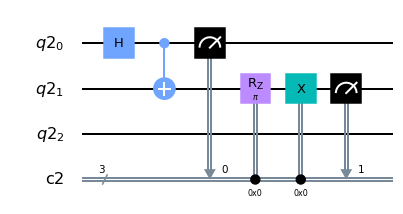

In [6]:

print ("# CLASSICAL IF   #############################################################")

q = QuantumRegister(3)
c = ClassicalRegister(3)
circ = QuantumCircuit(q, c)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.measure(q[0], c[0])
circ.rz(np.pi, q[1]).c_if(c, 0)
circ.x(q[1]).c_if(c, 0)
circ.measure(q[1], c[1])

print(circ.qasm())

circ.draw(output='mpl')